# A summary of what this notebook entails:

### Introduction to problem:

We are handling a [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)) of biopsies for breast cells from the University of Wisconsin: 

We are looking to train a model that predicts whether a biopsy is benign of malignant. We have 699 biopsy results.


#### Using exploratory data analysis we were able to determine that:

1) The target is highly correlated to the raw features, especially those that measure uniformity.

2) Using couples of raw features and a scatter plot, we noticed that the data is highly suitable for a tree-based method.

#### We then trained the data using a train-test-validate approch, and searched the paramter space for both BDT and Random Forest models.

#### Based on our final confusion matrix, we have: 

Sensitivity: 35/35 = 100% (this is only a statistical 100%, of course)

Specificity: 48/49 = 98% 

This is done using a Random Forset algorithm with max_depth=8, and n_trees=50.

##### This final result is very good, to a level where statistical noise in the final validation set is more significant than any potential improvement from a new model we will choose to train. BDTs and Random Forests have proven as capable solutions to this problem.

At this iteration, incomplete and redundent data has been eliminated. There is a small dataset for patients with multiple biopsies, or incomplete biopsies, and careful consideration must be employed to understand how to include them in a future result.

### Introduction to problem:

We are handling a [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)) of biopsies for breast cells from the University of Wisconsin: 

We are looking to train a model that predicts whether a biopsy is benign of malignant. We have 699 biopsy results.

At a first glance one can notice that there are some "?" entries which refer to incomplete data points.

Looking at the last two rows, one can also see that there are sometimes multiple entries for the same tissue.

We will have to consider how to handle these issues, but first we can do some EDA.

##### Load the data with pandas:

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("breast-cancer-wisconsin.data.txt", header=None)

Relabel columns to reflect:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [6]:
data.columns = ["ID", "Thickness", "Uniformity_Size", "Uniformity_Shape",
                "Adhesion", "Ep_Size", "Nuclei", "Chromatin", "Nucleoli", "Mitoses",
               "Class"]

In [7]:
data

,ID,Thickness,Uniformity_Size,Uniformity_Shape,Adhesion,Ep_Size,Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


##### Let's explore some simple correlations 

In [8]:
data.corr()

,ID,Thickness,Uniformity_Size,Uniformity_Shape,Adhesion,Ep_Size,Chromatin,Nucleoli,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Ep_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


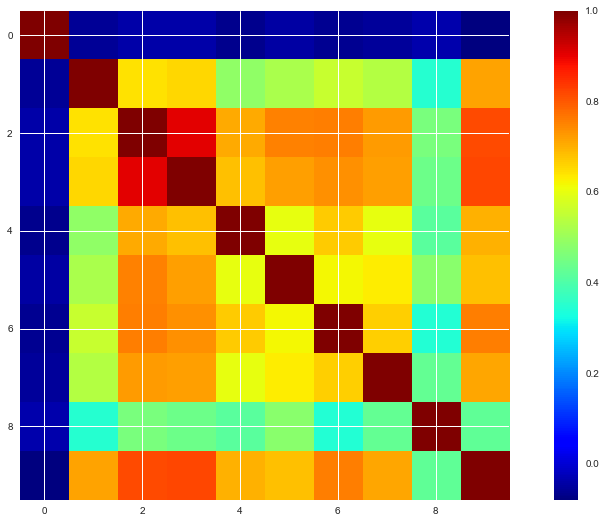

In [147]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

plt.imshow(data.corr(), cmap='jet');
plt.colorbar()
plt.show()

#### The map and matrix clearly shows that the uniformity parameters are the most highly (linearly) correlated features to the class 

#### We can now explore these two and how they relate to the class in a nice scatter plot (with jitter)

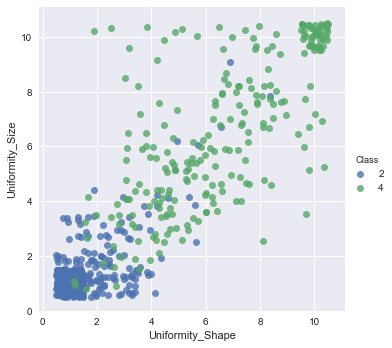

In [44]:
import seaborn as sns
sns.set()
sns.lmplot(x="Uniformity_Shape", y="Uniformity_Size", data=data, fit_reg=False, 
           hue="Class", x_jitter=0.5, y_jitter=0.5)

##### We can now explore other interesting pairs of variables as well

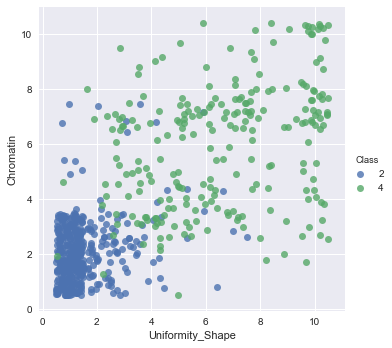

In [45]:
import seaborn as sns
sns.set()
sns.lmplot(x="Uniformity_Shape", y="Chromatin", data=data, fit_reg=False, 
           hue="Class", x_jitter=0.5, y_jitter=0.5)

There are clearly more exceptions here, but less extreme exceptions!

These rectangles are "and" statements. "If feature 1 is less than x, and feature 2 is less than y, you are safe". That can work well with a decision tree (but will need to have significant depth to account for other variables.) Logistic regression may work too and is simpler to train.

We also note that the objective is likely not to maximize the accuracy, but rather to make sure there are very few false negatives, while minimizing the costs of surgery to those who are clearly safe. Therefore we should prefer decision trees (why? notice the contamination you would get if trying to cut through this data with a straight line).

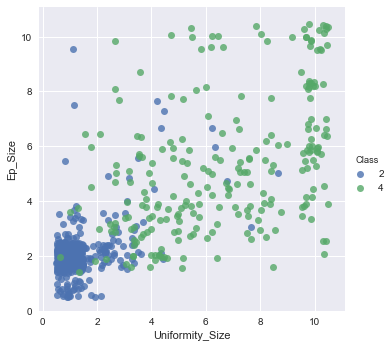

In [46]:
import seaborn as sns
sns.set()
sns.lmplot(x="Uniformity_Size", y="Ep_Size", data=data, fit_reg=False, 
           hue="Class", x_jitter=0.5, y_jitter=0.5)

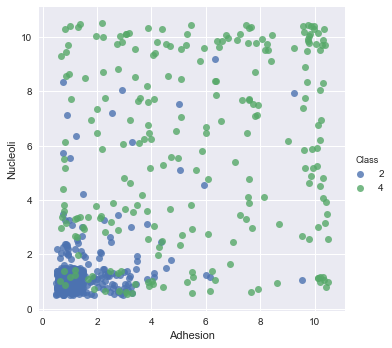

In [48]:
import seaborn as sns
sns.set()
sns.lmplot(x="Adhesion", y="Nucleoli", data=data, fit_reg=False, 
           hue="Class", x_jitter=0.5, y_jitter=0.5)

##### Recall that some IDs go through test multiple times, but it is not very large:

In [58]:
print(len(data["ID"].unique()))
print(len(data["ID"].unique())/len(data["ID"]))

645
0.9227467811158798


##### So 92% of IDs are unique.  Is the same true when considering classification?

In [59]:
IDClassDF = data[["ID", "Class"]]
print(IDClassDF.shape)

(699, 2)


In [60]:
IDClassDF.drop_duplicates().shape

(649, 2)

##### So there are a few cases of IDs that get classified multiple ways!

To begin dealing with duplicates and "?" this we will: 

1) Take none of the tissues that have multiple biopsies.

2) Remove all rows with "?" on any propery (seems to be relatively few).

At the end of this, we should still have most of our data.

In [62]:
cleanDF = data.drop_duplicates(subset = "ID", keep = False)

There's only one column with "?" values:

In [96]:
cleanDF = cleanDF[cleanDF.iloc[:,6]!="?"]

We can now get rid of the strings with the apply function

In [101]:
cleanDF = cleanDF.applymap(lambda x: int(x))

#### We can now use cleanDF to train BDTs on the data

In [121]:
from sklearn.utils import shuffle
cleanDF = shuffle(cleanDF)
X = cleanDF.iloc[:500, 1:-1]
Y = cleanDF.iloc[:500, -1]

Xval = cleanDF.iloc[500:, 1:-1]
Yval = cleanDF.iloc[500:, -1]

In [116]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [139]:
parameters = {'max_depth':range(3,8)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=2)
clf.fit(X, Y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.956 {'max_depth': 4}


In [140]:
tree_model.score(Xval, Yval)

0.9404761904761905

In [141]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix:")
print(confusion_matrix(Yval, tree_model.predict(Xval)))

The confusion matrix:
[[45  4]
 [ 1 34]]


#### This is quite good, with a recall of 34/35! 

#### We can now try a random forest method as well

In [144]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth':range(3,10), 'n_estimators':[5,10,20,50,100]}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2)
clf.fit(X, Y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.974 {'max_depth': 8, 'n_estimators': 50}


In [145]:
tree_model.score(Xval, Yval)

0.9880952380952381

In [146]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix:")
print(confusion_matrix(Yval, tree_model.predict(Xval)))

The confusion matrix:
[[48  1]
 [ 0 35]]


##### It is kind of odd that we are doing even better than the cross-validation set. We can call it a statistical fluctuation -- as is likely to happen with N~100 validation data points.

## Summary:

### Using exploratory data analysis we were able to determine that:

### 1) The target is highly correlated to the raw features, especially those that measure uniformity.

### 2) Using couples of raw features and a scatter plot, we noticed that the data is highly suitable for a tree-based method.

### We then trained the data using a train-test-validate approch, and searched the paramter space for both BDT and Random Forest models.

### Based on our final confusion matrix, we have: 

### Sensitivity: 35/35 = 100% (this is only a statistical 100%, of course)

### Specificity: 48/49 = 98% 

### This is done using a Random Forset algorithm with max_depth=8, and n_trees=50.

### This final result is very good, to a level where statistical noise in the final validation set is more significant than any potential improvement from a new model we will choose to train. BDTs and Random Forests have proven as capable solutions to this problem.

### At this iteration, incomplete and redundent data has been eliminated. There is a small dataset for patients with multiple biopsies, or incomplete biopsies, and careful consideration must be employed to understand how to include them in a future result.